In [1]:
from math import sqrt

plot1 = [1, 3]
plot2 = [2, 5]

euclidean_distance = sqrt((plot1[0] - plot2[0])**2 + (plot1[1] - plot2[1])**2)
print('Euclidean Distance: {}'.format(euclidean_distance))

Euclidean Distance: 2.23606797749979


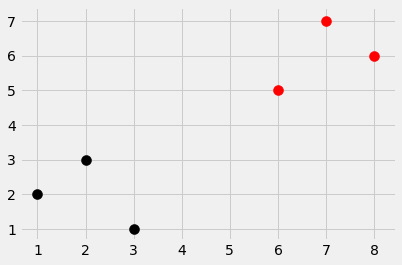

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings

style.use('fivethirtyeight')

dataset = {'k': [[1,2], [2,3], [3,1]], 'r':[[6,5], [7,7], [8,6]]}
new_features = [5,7]

for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0], ii[1], s=100, color=i)
        
plt.show()

In [3]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('Dont be an idiot')
        
    distances = []
    for group in data:
        for features in data[group]:
            # euclidean_distance = np.sqrt(np.sum((np.array(features) - np.array(predict))**2))
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    votes_result = Counter(votes).most_common(1)[0][0]
    
    return votes_result

In [4]:
result = k_nearest_neighbors(dataset, new_features, k=3)
print('Result: {}'.format(result))

Result: r


In [5]:
import pandas as pd
import random

df = pd.read_csv('../datasets/UWMadisonBreastCancer.txt')
df.replace('?', -112233, inplace=True)
df.drop(['id'], 1, inplace=True)

# We need all floats, some show quotes. We need to remove that
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)

# Get the data ready
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
training_data = full_data[:-int(test_size * len(full_data))]
testing_data = full_data[-int(test_size * len(full_data)):]

# Fill the dictionaries
for i in training_data:
    train_set[i[-1]].append(i[:-1])

for i in testing_data:
    test_set[i[-1]].append(i[:-1])
    
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1

print('Accuracy: {}'.format((correct/total)*100))

Accuracy: 96.40287769784173
